###### 1. *[Import Packages](#import_packages)*
2. *[Read Data](#Read_Data)*
3. *[Understand and Prepare the Data](#data_preparation_preprocessing_cleaning)*
    - 3.1 - [Data Types and Dimensions](#Data_Types)
    - 3.2 - [Data Manipulation](#Data_Manipulation)
    - 3.3 - [Data format Treatment] ,[Missing Data Treatment] ,[Duplicate Data Treatment] ,[Outliers Data Treatment](#Data_Treatment)
    - 3.4 - [Statistical Summary](#Statistical_Summary)
4. *[EDA](#EDA)*    
    - 4.1 - [Univariate Analysis](#Univariate_Analysis)
    - 4.2 - [Bivariate Analysis](#Bivariate_Analysis)
    - 4.3 - [Multivariate Analysis](#Multivariate_Analysis)
    - 4.4 - [Conclusion of EDA](#Conclusion_of_EDA)
5. *[Label Encoding for categorical Variable](#Label_Encoding_for_categorical_Variable)*
6. *[Feature Selection](#feature_selection)*
7. *[Feature Engineering](#feature_selection)*
7. *[Standardise Data](#Standardise_Data)*
9. *[ML Models](#ML_Models)*-----
       - 9.1 - [Linear Regression](#Regression) 
10. *[Model Evaluation](#ML_Models)* 
11. *[Model Tuning](#ML_Models)*
11. *[Model Selection](#ML_Models)*
12. *[Model Deployment](#ML_Models)*

###### PROMBLE STATEMENT:

"To develop a predictive model that estimates a student's social media addiction score based on their demographics,social media usage behavior, and lifestyle factors.The objective is to identify key factors influencing addiction levels and enable early intervention strategies for improving academic performance 
and mental well-being."

The project aims to develop a predictive model that estimates a student’s social media addiction score (Addicted_Score) based on various demographic,behavioral, and lifestyle factors. The input variables used for the prediction include Age, Gender, Academic Level, Country, Average Daily Usage Hours, Most Used Platform, Affects Academic Performance, Sleep Hours Per Night, Mental Health Score, Relationship Status, and Conflicts Over Social Media, while Student_ID is excluded as it only serves as an identifier. By analyzing these features, the model will learn the patterns and relationships influencing addiction levels, enabling accurate prediction of a student’s Addicted_Score on a scale of 0–10.
This can help in identifying high-risk students and providing actionable insights to improve academic performance and mental well-being.



Target Variable:
1. Addicted_Score (Numeric, 0–10)
Represents the level of social media addiction of a student

The input variables for the project are:
1. Age
2. Gender
3. Academic Level
4. Country
5. Avg_Daily_Usage_Hours
6. Most_Used_Platform
7. Affects_Academic_Performance
8. Sleep_Hours_Per_Night
9. Mental_Health_Score
10. Relationship_Status
11. Conflicts_Over_Social_Media

###### 1.importing packages

In [614]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd()
pd.set_option("display.max_columns",None)

###### 2. Data reading

In [616]:
df=pd.read_csv("Students Social Media Addiction.csv",index_col=0)

In [617]:
df

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,,,
1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7


###### 3.Understand and Prepare the Data

In [619]:
df.shape

(705, 12)

In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 1 to 705
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Country                       705 non-null    object 
 4   Avg_Daily_Usage_Hours         705 non-null    float64
 5   Most_Used_Platform            705 non-null    object 
 6   Affects_Academic_Performance  705 non-null    object 
 7   Sleep_Hours_Per_Night         705 non-null    float64
 8   Mental_Health_Score           705 non-null    int64  
 9   Relationship_Status           705 non-null    object 
 10  Conflicts_Over_Social_Media   705 non-null    int64  
 11  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 71.6+ KB


In [621]:
df.dtypes

Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

In [622]:
df.describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [623]:
df.describe(include="all")

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705,705,705,705.000000,705,705,705.000000,705.000000,705,705.000000,705.000000
unique,NaN,2,3,110,NaN,12,2,NaN,NaN,3,NaN,NaN
top,NaN,Female,Undergraduate,India,NaN,Instagram,Yes,NaN,NaN,Single,NaN,NaN
freq,NaN,353,353,53,NaN,249,453,NaN,NaN,384,NaN,NaN
mean,20.659574,NaN,NaN,NaN,4.918723,NaN,NaN,6.868936,6.226950,NaN,2.849645,6.436879
std,1.399217,NaN,NaN,NaN,1.257395,NaN,NaN,1.126848,1.105055,NaN,0.957968,1.587165
min,18.000000,NaN,NaN,NaN,1.500000,NaN,NaN,3.800000,4.000000,NaN,0.000000,2.000000
25%,19.000000,NaN,NaN,NaN,4.100000,NaN,NaN,6.000000,5.000000,NaN,2.000000,5.000000
50%,21.000000,NaN,NaN,NaN,4.800000,NaN,NaN,6.900000,6.000000,NaN,3.000000,7.000000
75%,22.000000,NaN,NaN,NaN,5.800000,NaN,NaN,7.700000,7.000000,NaN,4.000000,8.000000


###### format issues

no format issues

###### NUll tertamemts 

In [627]:
df.isnull().sum()

Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

there is no null in the data after format issue check

In [629]:
df.duplicated().sum()

1

In [630]:
df[df.duplicated()]

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,,,
274,21,Male,Graduate,Italy,5.4,Instagram,Yes,6.7,5,Single,3,7


In [631]:
# df[df.duplicated()] # we have one duplicate here simply we can drop it

In [632]:
df1=df.drop_duplicates()
df1

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,,,
1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7


In [633]:
# after drop  duplicated the rows and columns are 
df1.shape

(704, 12)

###### Checking Outliers/Errors

In [635]:
df1.dtypes.values

array([dtype('int64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('int64'), dtype('O'), dtype('int64'), dtype('int64')],
      dtype=object)

In [636]:
Q1 = df1['Avg_Daily_Usage_Hours'].quantile(0.25)
Q3 = df1['Avg_Daily_Usage_Hours'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df1['Avg_Daily_Usage_Hours'] = df1['Avg_Daily_Usage_Hours'].clip(lower, upper)

In [637]:
import pandas as pd

outliers = {}

for col in num_col:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers[col] = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)][col]

outliers

{'Age': Series([], Name: Age, dtype: int64),
 'Avg_Daily_Usage_Hours': Series([], Name: Avg_Daily_Usage_Hours, dtype: float64),
 'Sleep_Hours_Per_Night': Series([], Name: Sleep_Hours_Per_Night, dtype: float64),
 'Mental_Health_Score': Series([], Name: Mental_Health_Score, dtype: int64),
 'Conflicts_Over_Social_Media': Series([], Name: Conflicts_Over_Social_Media, dtype: int64),
 'Addicted_Score': Series([], Name: Addicted_Score, dtype: int64)}

In [638]:
num_col = df1.select_dtypes(include=['int64', 'float64']).columns
num_col

Index(['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [639]:
num_df=df1.select_dtypes(include=['int64',"float64"])
num_df

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,
1,19,5.2,6.5,6,3,8
2,22,2.1,7.5,8,0,3
3,20,6.0,5.0,5,4,9
4,18,3.0,7.0,7,1,4
5,21,4.5,6.0,6,2,7
...,...,...,...,...,...,...
701,20,4.7,7.2,7,2,5
702,23,6.8,5.9,4,5,9
703,21,5.6,6.7,6,3,7


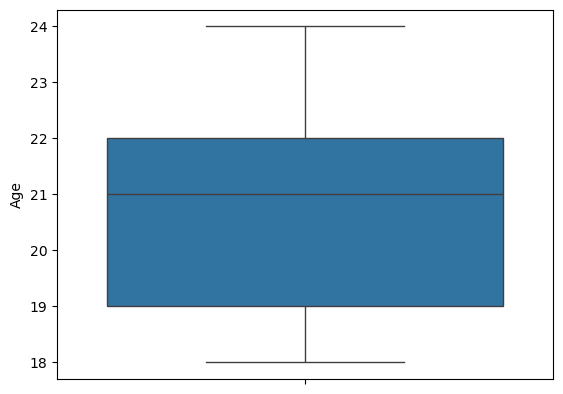

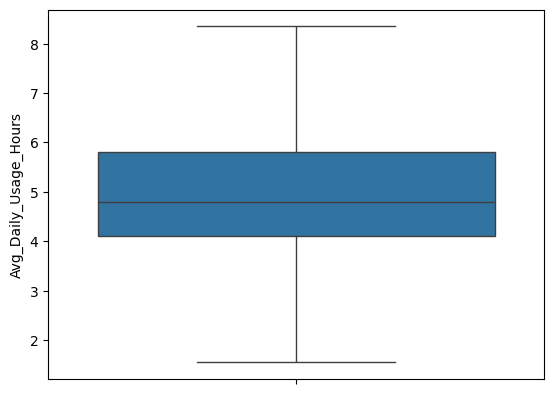

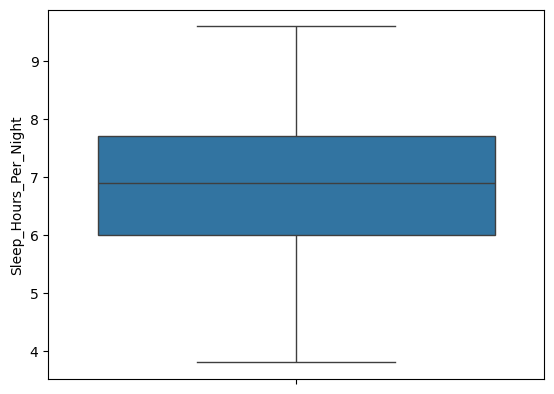

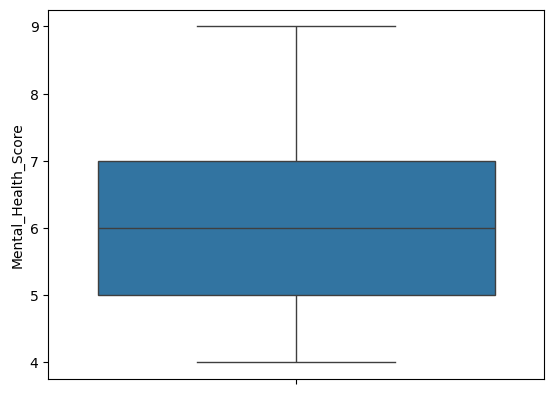

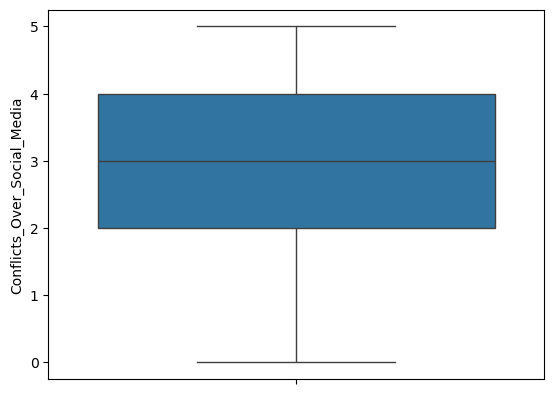

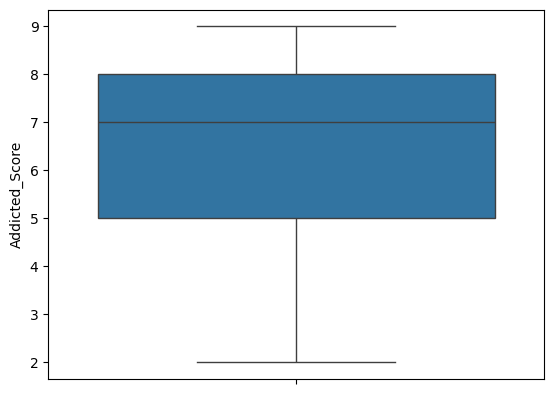

In [640]:
for i in num_df.columns:
    sns.boxplot(df1[i])
    plt.show()

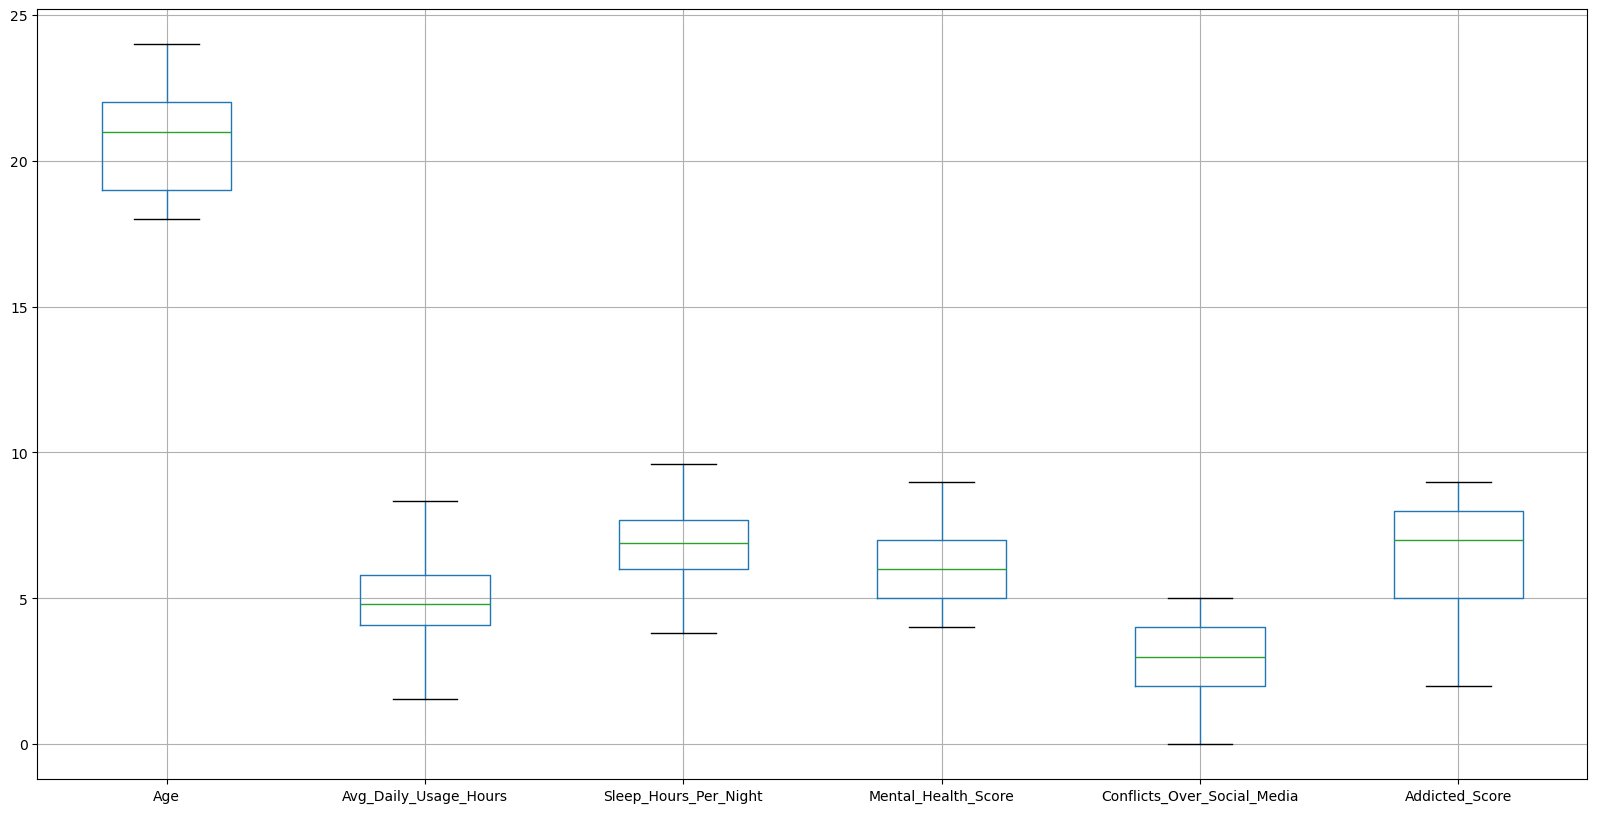

In [641]:
plt.figure(figsize=(20,10))
df1.boxplot()
plt.show()

1)  previously we have 3 outliers in the Avg_Daily_Usage_Hours then we called clip function for lower,upper outliers
 2) It supress the outlies without dropping it

###### Feature Engineering

In [644]:
num_col = df1.select_dtypes(include=['int64', 'float64']).columns
num_col

Index(['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

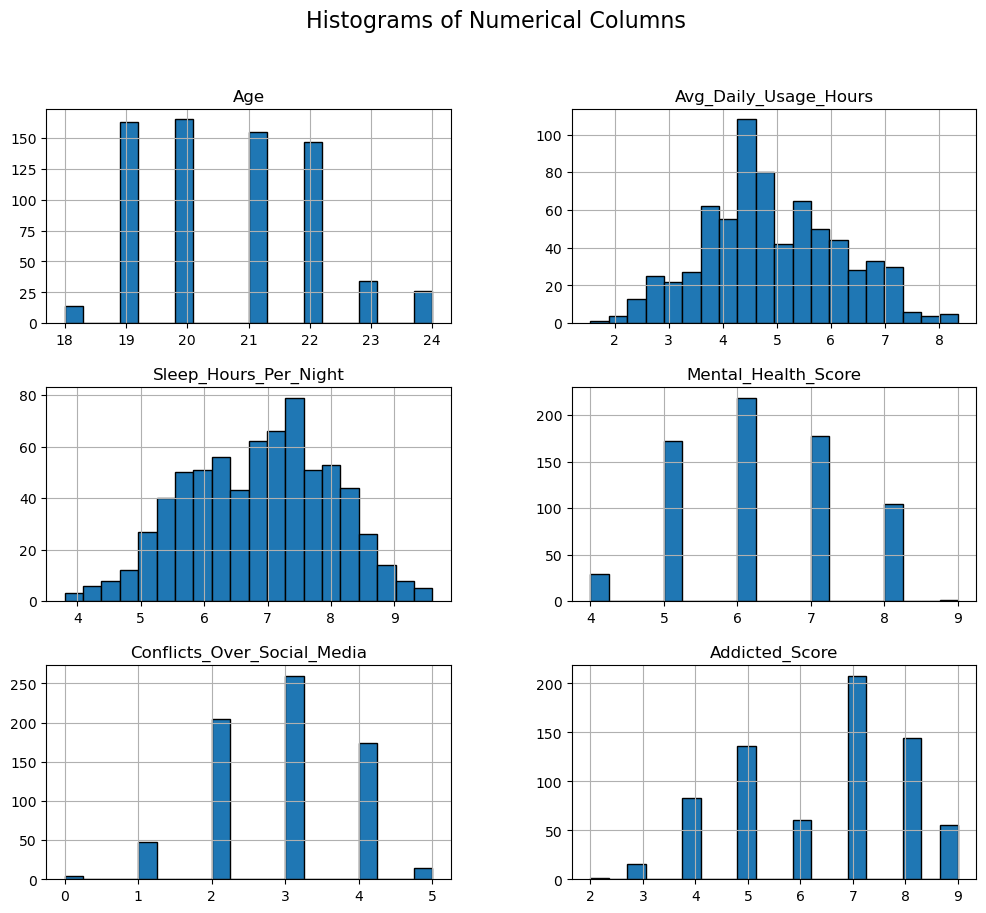

In [645]:
#Histogram for Numerical Columns
import matplotlib.pyplot as plt

df1.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.show()

#This will show the distributions for Age, Avg_Daily_Usage_Hours, Sleep_Hours_Per_Night, Mental_Health_Score, Conflicts_Over_Social_Media, and Addicted_Score.

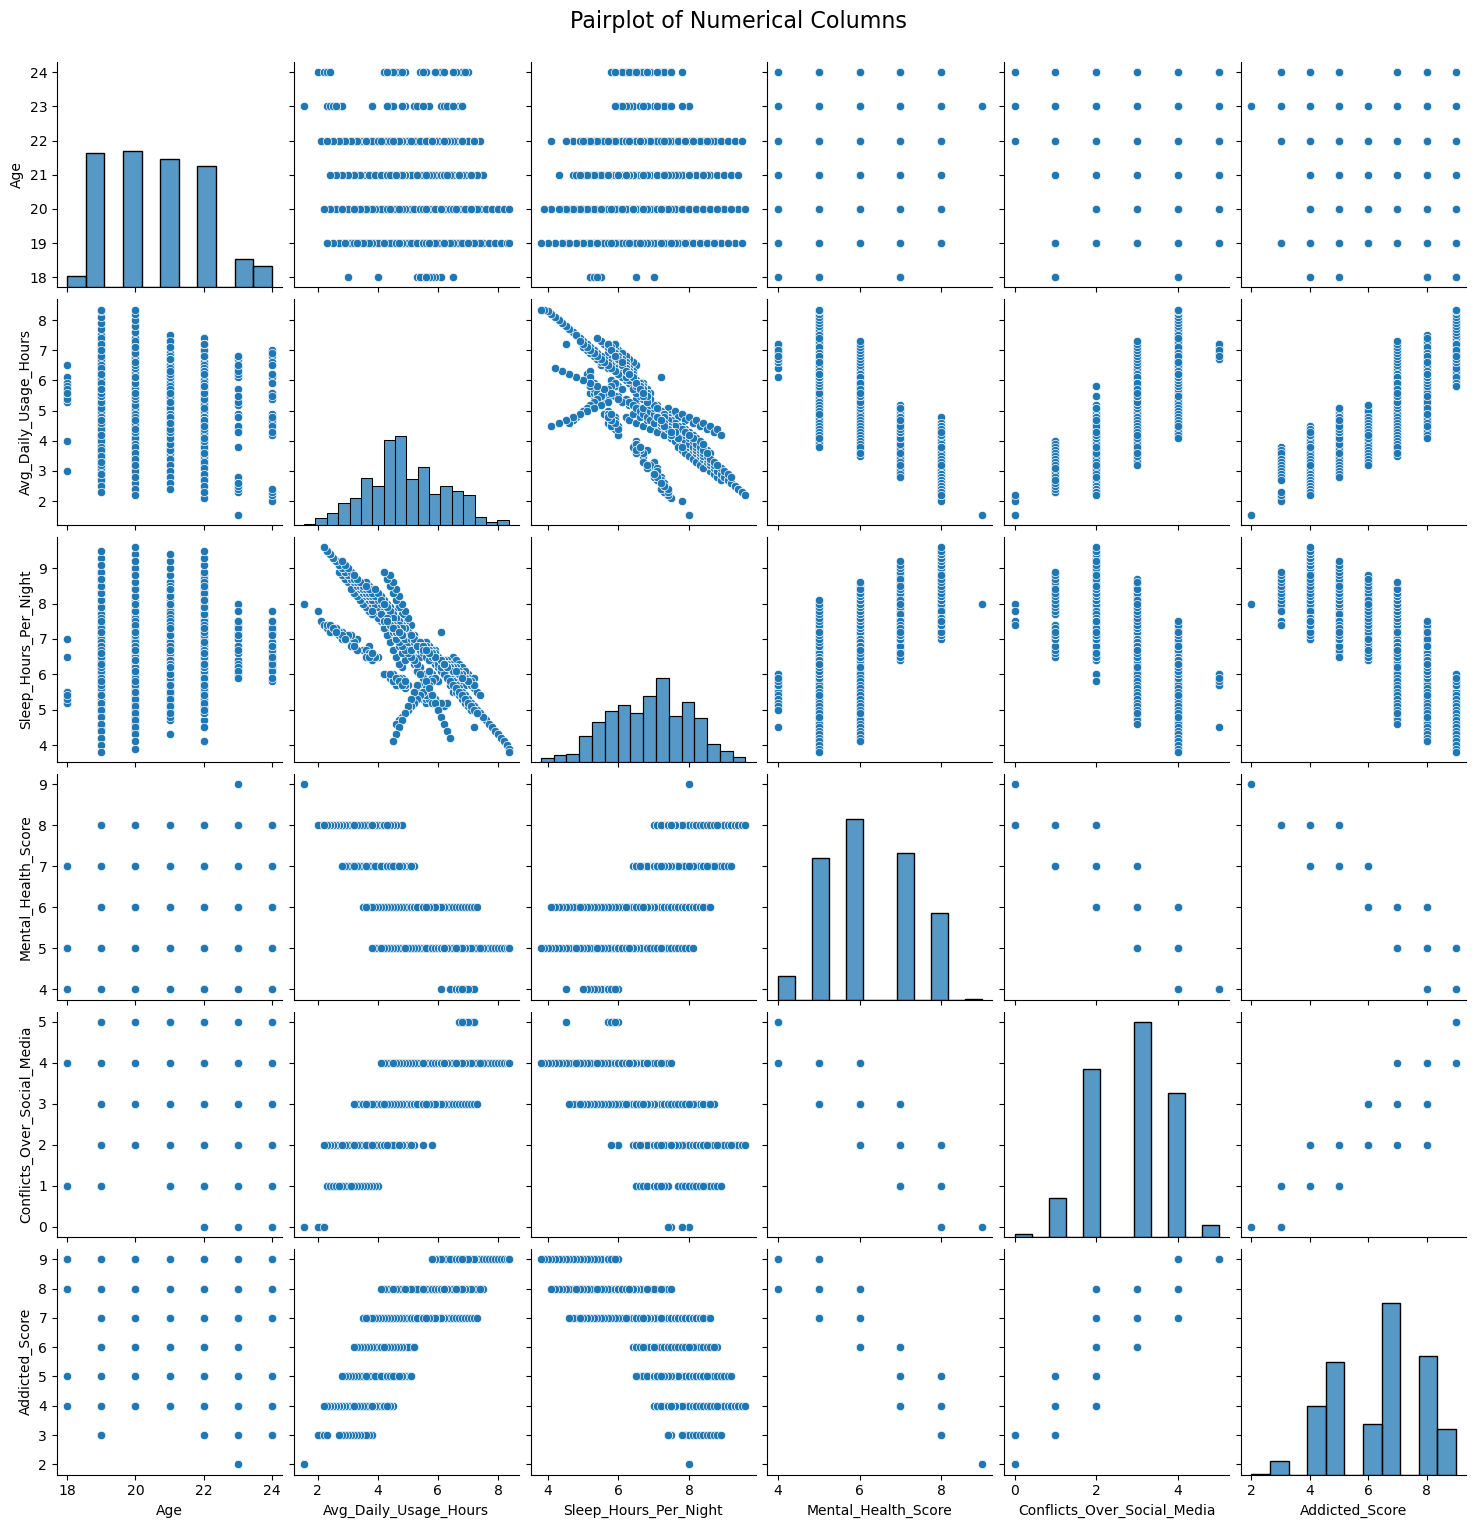

In [646]:
#Pairplot for Numerical Columns
import seaborn as sns

sns.pairplot(df1[['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                  'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']])
plt.suptitle("Pairplot of Numerical Columns", y=1.02, fontsize=16)
plt.show()
#This helps visualize correlations between numerical features.

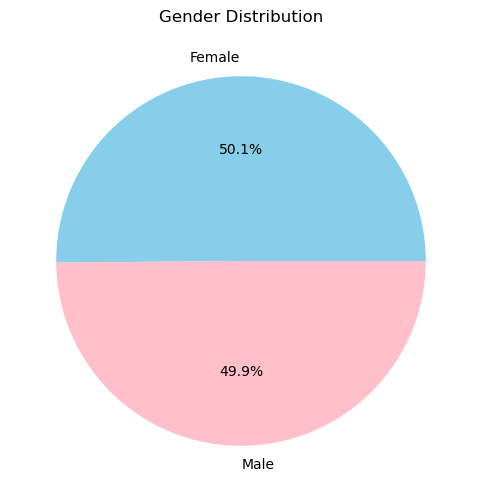

In [647]:
# Pie Chart for Categorical Columns

df1['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'pink'], figsize=(6, 6))
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

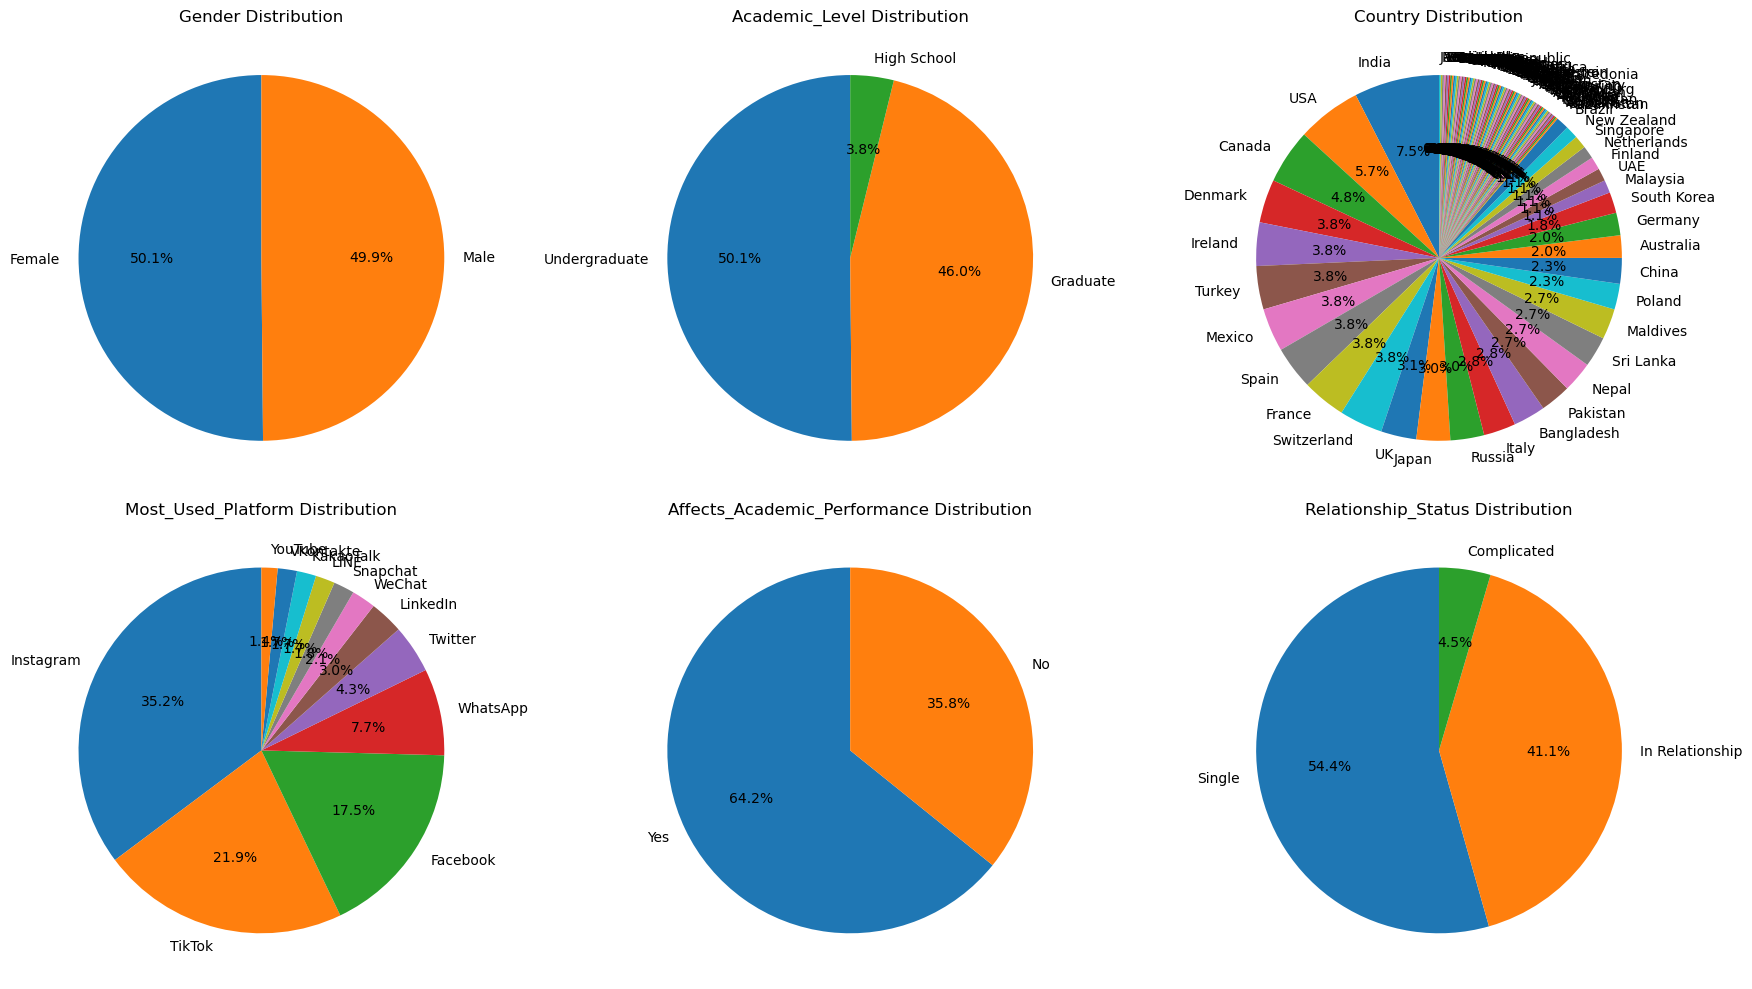

In [648]:
import matplotlib.pyplot as plt

# Categorical columns
cat_cols = ['Gender', 'Academic_Level', 'Country', 
            'Most_Used_Platform', 'Affects_Academic_Performance', 
            'Relationship_Status']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows × 3 columns
axes = axes.flatten()  # Flatten for easy iteration

# Plot pie charts
for i, col in enumerate(cat_cols):
    df1[col].value_counts().plot.pie(
        ax=axes[i], 
        autopct='%1.1f%%', 
        startangle=90
    )
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_ylabel("")  # Remove default ylabel

# Remove extra axes if any
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

###### FEATURES SELECTION

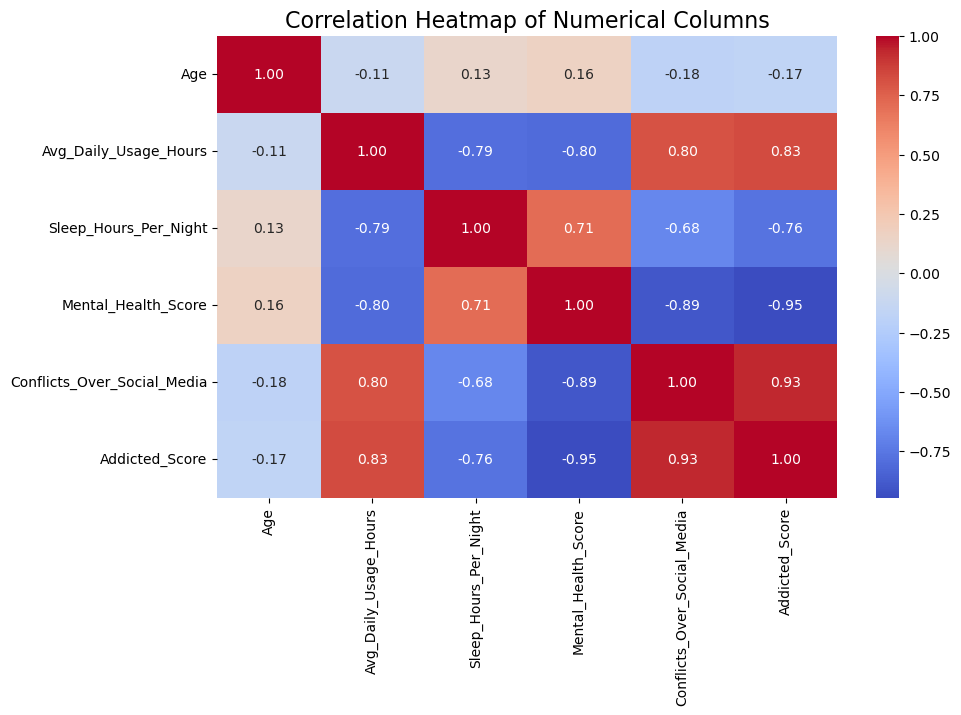

In [650]:
#Correlation Heat Map

corr = df1.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns", fontsize=16)
plt.show()

###### observation:
1) Variables like Conflicts_Over_Social_Media, Mental_Health_Score, and Addicted_Score are highly correlated.

2) This can cause multicollinearity problems in regression models.

###### obsevation:(satstices summary)
1)Histograms → data distribution

2) Pairplots → relationships between numerical features

3) Pie charts → categorical distributions

4) Heatmap → correlation strength

In [653]:
# Solution:

# Use VIF (Variance Inflation Factor) to confirm multicollinearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df1[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media']]
X = add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                       Feature         VIF
0                        const  566.121140
1        Avg_Daily_Usage_Hours    4.273038
2        Sleep_Hours_Per_Night    2.785577
3          Mental_Health_Score    5.682349
4  Conflicts_Over_Social_Media    5.602567


###### Encoding Implementation

In [655]:
cat_df=df1.select_dtypes(include="object")

for i in cat_df.columns:
  print("\n",cat_df[i].unique())


 ['Female' 'Male']

 ['Undergraduate' 'Graduate' 'High School']

 ['Bangladesh' 'India' 'USA' 'UK' 'Canada' 'Australia' 'Germany' 'Brazil'
 'Japan' 'South Korea' 'France' 'Spain' 'Italy' 'Mexico' 'Russia' 'China'
 'Sweden' 'Norway' 'Denmark' 'Netherlands' 'Belgium' 'Switzerland'
 'Austria' 'Portugal' 'Greece' 'Ireland' 'New Zealand' 'Singapore'
 'Malaysia' 'Thailand' 'Vietnam' 'Philippines' 'Indonesia' 'Taiwan'
 'Hong Kong' 'Turkey' 'Israel' 'UAE' 'Egypt' 'Morocco' 'South Africa'
 'Nigeria' 'Kenya' 'Ghana' 'Argentina' 'Chile' 'Colombia' 'Peru'
 'Venezuela' 'Ecuador' 'Uruguay' 'Paraguay' 'Bolivia' 'Costa Rica'
 'Panama' 'Jamaica' 'Trinidad' 'Bahamas' 'Iceland' 'Finland' 'Poland'
 'Romania' 'Hungary' 'Czech Republic' 'Slovakia' 'Croatia' 'Serbia'
 'Slovenia' 'Bulgaria' 'Estonia' 'Latvia' 'Lithuania' 'Ukraine' 'Moldova'
 'Belarus' 'Kazakhstan' 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan' 'Armenia'
 'Georgia' 'Azerbaijan' 'Cyprus' 'Malta' 'Luxembourg' 'Monaco' 'Andorra'
 'San Marino' 'Vatican C

In [656]:
 cat_df.columns

Index(['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Relationship_Status'],
      dtype='object')

In [657]:
df_enc_backup = df1.copy(deep = True)
df_enc_backup.head(1)

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,,,
1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8


###### Label_encoding

In [698]:
df_enc_backup

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,,,
1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7


In [692]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Relationship_Status'] :
    df1[i] = le.fit_transform(df1[i])

In [696]:
df1

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,,,
1,19,0,2,10,5.2,1,1,6.5,6,1,3,8
2,22,1,0,39,2.1,7,0,7.5,8,2,0,3
3,20,0,2,102,6.0,6,1,5.0,5,0,4,9
4,18,1,1,101,3.0,11,0,7.0,7,2,1,4
5,21,1,0,18,4.5,0,1,6.0,6,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
701,20,0,2,44,4.7,6,0,7.2,7,1,2,5
702,23,1,0,82,6.8,1,1,5.9,4,2,5,9
703,21,0,2,20,5.6,9,1,6.7,6,1,3,7


###### One-Hot Encoder

In [701]:
df2 = pd.get_dummies(df1).astype('int')
df2.head(5)

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,,,
1,19,0,2,10,5,1,1,6,6,1,3,8
2,22,1,0,39,2,7,0,7,8,2,0,3
3,20,0,2,102,6,6,1,5,5,0,4,9
4,18,1,1,101,3,11,0,7,7,2,1,4
5,21,1,0,18,4,0,1,6,6,1,2,7


In [703]:
df2.dtypes

Age                             int32
Gender                          int32
Academic_Level                  int32
Country                         int32
Avg_Daily_Usage_Hours           int32
Most_Used_Platform              int32
Affects_Academic_Performance    int32
Sleep_Hours_Per_Night           int32
Mental_Health_Score             int32
Relationship_Status             int32
Conflicts_Over_Social_Media     int32
Addicted_Score                  int32
dtype: object

###### FEATURES SCALING

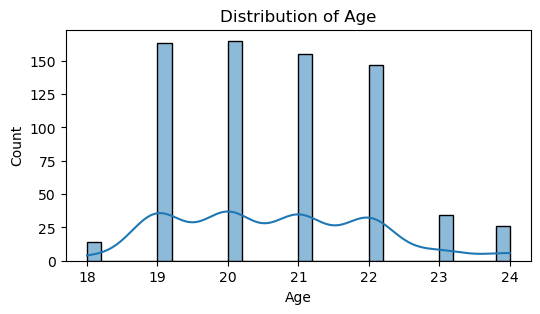

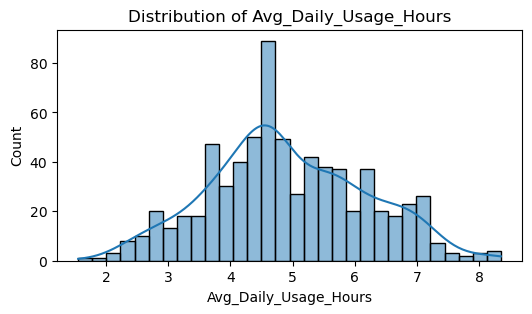

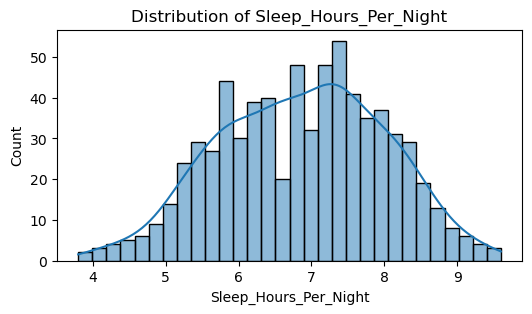

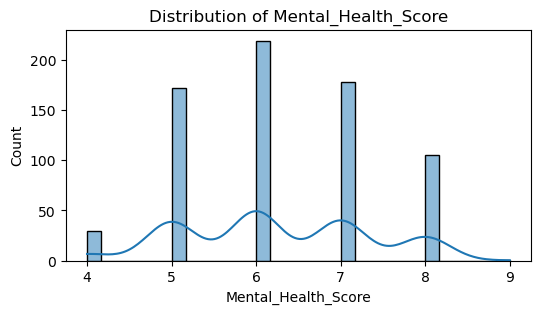

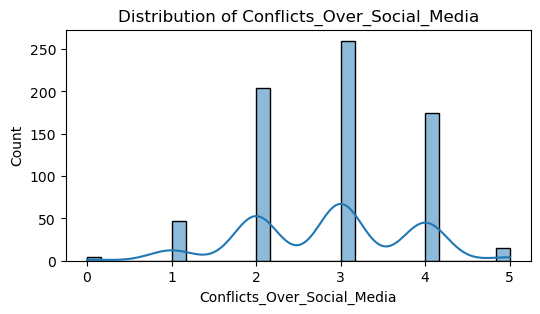

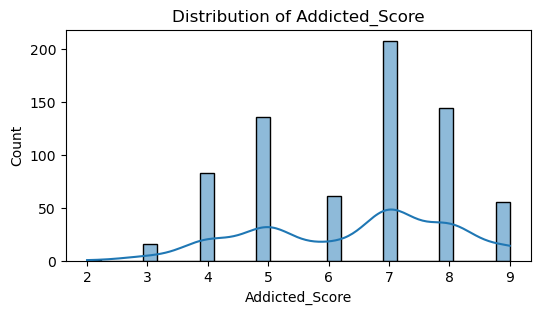

In [721]:
import pandas as pd

num_cols = df_enc_backup.select_dtypes(include=['int64', 'float64']).columns
num_cols

import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_enc_backup[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.show()

1) one of the features are normally distributed.

2) Using StandardScaler is less effective because it assumes normal distribution.

3) MinMaxScaler or RobustScaler would be better choices for feature scaling.

In [712]:
# Separate features and target
feature = df2.drop('Addicted_Score', axis=1)
target= df2['Addicted_Score']

considered MinMaxScaler because it is useful if: Features are not normally distributed.

we want to scale all features between 0 and 1 (or a specific range).

we are working with distance-based algorithms (like KNN, SVM) or neural networks, where different feature ranges can bias the model.

In [754]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [756]:
X_scaled

,const,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media
0,0.0,0.536765,0.465517,0.4,0.6
1,0.0,0.080882,0.637931,0.8,0.0
2,0.0,0.654412,0.206897,0.2,0.8
3,0.0,0.213235,0.551724,0.6,0.2
4,0.0,0.433824,0.379310,0.4,0.4
...,...,...,...,...,...
699,0.0,0.463235,0.586207,0.6,0.4
700,0.0,0.772059,0.362069,0.0,1.0
701,0.0,0.595588,0.500000,0.4,0.6
702,0.0,0.404412,0.637931,0.8,0.4


In [748]:
X_scaled1 = scaler.fit_transform(X)

In [750]:
X_scaled1

array([[0.        , 0.53676471, 0.46551724, 0.4       , 0.6       ],
       [0.        , 0.08088235, 0.63793103, 0.8       , 0.        ],
       [0.        , 0.65441176, 0.20689655, 0.2       , 0.8       ],
       ...,
       [0.        , 0.59558824, 0.5       , 0.4       , 0.6       ],
       [0.        , 0.40441176, 0.63793103, 0.8       , 0.4       ],
       [0.        , 0.68382353, 0.43103448, 0.2       , 0.8       ]])

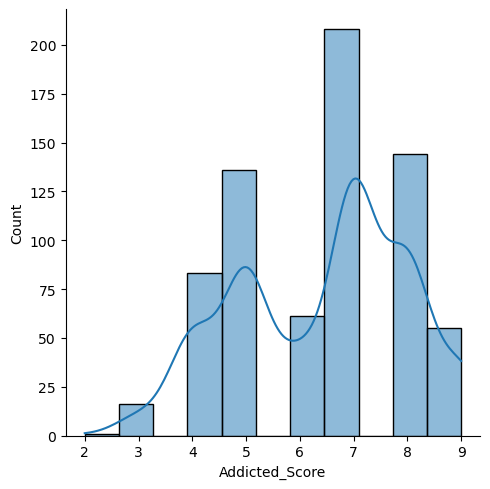

In [758]:
sns.displot(target,kde=True)
plt.show()

In [760]:
target_log=np.log(target)

In [764]:
target_log

Student_ID
1      2.079442
2      1.098612
3      2.197225
4      1.386294
5      1.945910
         ...   
701    1.609438
702    2.197225
703    1.945910
704    1.386294
705    2.079442
Name: Addicted_Score, Length: 704, dtype: float64

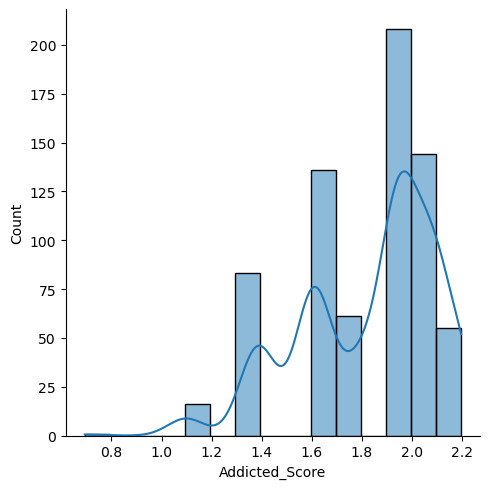

In [762]:
sns.displot(target_log,kde=True)
plt.show()

The log-transformed Addicted_Score ranges from approximately 1.09 to 2.20, indicating a compressed and stabilized distribution. Most students fall between 1.3 and 2.0, suggesting moderate social media addiction levels. This transformation reduces skewness, minimizes outlier influence, and improves suitability for predictive modeling by creating a more linear relationship between features and target.

###### Model Selection

Model Selection Since the target is continuous (log-transformed addiction score), we can start with:

Linear Regression (baseline)

Random Forest Regressor (handles non-linear patterns)

###### Model Training

###### WITH RANDOM FOREST

In [810]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# # Train-Test Split 
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)
y_pred_X_scaled=rf_model.predict(X_scaled)

# Metrics function
def calculate_metrics(y_true, y_pred, dataset_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nMetrics for {dataset_name}:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R² Score: {r2:.4f}")

# Evaluate
calculate_metrics(y_train, y_pred_train, "Train Set")
calculate_metrics(y_test, y_pred_test, "Test Set")


Metrics for Train Set:
RMSE: 0.1518
MSE: 0.0230
MAE: 0.0646
MAPE: 1.13%
R² Score: 0.9907

Metrics for Test Set:
RMSE: 0.3706
MSE: 0.1373
MAE: 0.1962
MAPE: 3.77%
R² Score: 0.9484


###### WITH LINEAR REGRESSION 

In [772]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np

# Split data into train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,target,test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

###### preduction

In [775]:
y_pred = model.predict(X_test)
y_pred_train=model.predict(X_train)

In [781]:
y_pred

array([7.34543163, 6.9352605 , 5.28327609, 7.16053761, 3.65014485,
       5.22781511, 8.99551932, 4.43814427, 6.75025245, 6.91416853,
       7.88761394, 7.54974621, 8.51850689, 8.35838425, 3.77210504,
       5.25448321, 4.46291565, 4.48199688, 7.22157472, 8.09348592,
       5.40144285, 8.20395177, 5.09436057, 8.42700824, 3.91716796,
       5.27735788, 6.51001147, 6.89140789, 4.27612491, 6.91617928,
       9.08523529, 6.51001147, 5.11723523, 5.85569189, 4.81986461,
       3.7416435 , 6.74444826, 7.24824282, 6.80738209, 5.17246816,
       7.63934815, 8.23441331, 5.04861124, 6.38994799, 7.77090597,
       8.34499319, 9.64247733, 3.72256228, 4.8884886 , 7.50756502,
       6.9903794 , 6.70829656, 4.20750092, 6.74065482, 6.69300877,
       8.3775795 , 5.00286191, 6.78640415, 8.22682643, 8.21153864,
       6.7654262 , 8.27636919, 5.89575106, 6.69490549, 6.67013411,
       5.11913195, 8.25159781, 6.76352948, 6.80927881, 8.32993346,
       6.93715722, 6.9352605 , 5.09436057, 8.20205505, 8.15630

In [783]:
y_pred.shape

(141,)

In [779]:
y_pred_train

array([5.30994419, 7.91048861, 7.90246379, 9.07753438, 8.32211852,
       8.72343051, 8.19826161, 5.38425834, 6.91238584, 6.55576079,
       4.5277462 , 5.25827665, 8.49563223, 6.67013411, 6.76732292,
       3.79118627, 4.69155101, 6.71398672, 7.3683063 , 5.83281722,
       6.45857198, 7.64860644, 6.7654262 , 5.05050796, 8.38326966,
       5.25068977, 5.14010989, 6.6854219 , 5.73562841, 8.63288021,
       7.85861119, 8.25159781, 4.39049822, 5.29833582, 4.36762356,
       6.71588344, 5.80994256, 5.21632076, 6.53288613, 4.9341239 ,
       5.22781511, 3.67491623, 6.71588344, 7.48469036, 6.72737778,
       4.52584948, 7.03612873, 4.36762356, 6.57863546, 5.22781511,
       5.28327609, 6.81697972, 9.61960266, 8.74440845, 5.83281722,
       5.40333957, 6.22525464, 8.40235089, 6.73686138, 6.55576079,
       5.07338262, 5.85000173, 5.87287639, 6.7387581 , 8.02486193,
       3.17681458, 6.93146706, 5.38236162, 8.38137294, 5.3059227 ,
       8.36786785, 9.61770594, 5.40713301, 6.26152037, 5.25068

In [785]:
y_pred_train.shape

(563,)

In [777]:
y_pred_scaled=model.predict(X_scaled)

In [787]:
y_pred_scaled

array([6.77502383, 3.15393992, 8.44810021, 4.61913358, 6.20059728,
       9.91898404, 2.361424  , 6.22525464, 4.7429905 , 4.62482374,
       7.50756502, 6.26152037, 3.89619001, 8.35269409, 5.34040573,
       6.86094635, 3.08910937, 7.61624818, 4.69155101, 6.89140789,
       8.32993346, 3.86952191, 6.91617928, 8.35849828, 5.30994419,
       8.40804104, 4.71821912, 6.88571774, 3.17681458, 8.38326966,
       4.69344773, 6.9352605 , 8.35280812, 3.89239657, 6.91238584,
       8.33562362, 4.66298619, 8.43091571, 5.40713301, 6.9085924 ,
       3.86572847, 8.360395  , 5.38236162, 6.93146706, 8.37568278,
       3.91527124, 6.89330461, 8.31274895, 5.3537968 , 8.41183448,
       5.42621423, 6.91238584, 3.88860314, 8.33752034, 5.40144285,
       6.95813517, 8.39855745, 3.9381459 , 6.88951117, 8.28987429,
       4.60005236, 7.64860644, 6.86094635, 9.08523529, 3.84475053,
       6.91428256, 5.40713301, 8.35849828, 3.89619001, 6.88761446,
       8.33183018, 5.33092214, 6.93715722, 8.38137294, 3.86952

In [789]:
y_pred_scaled.shape

(704,)

###### Model Evalution

In [795]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

def calculate_metrics(model, X, target, dataset_name):
    # Predictions
    y_pred = model.predict(X)
    
    # Number of samples and predictors
    n = X.shape[0]
    p = X.shape[1]

    # Metrics
    rmse = np.sqrt(mean_squared_error(target, y_pred))
    mse = mean_squared_error(target, y_pred)
    mae = mean_absolute_error(target, y_pred)
    mape = mean_absolute_percentage_error(target, y_pred) *100
    r2 = r2_score(target, y_pred)
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    # Print results
    print(f"\nMetrics for {dataset_name}:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adj_r2:.4f}")

# Metrics for test set
calculate_metrics(model, X_test, y_test, "y_test")

# Metrics for train set
calculate_metrics(model, X_train, y_train, "y_train")

# Metrics for full dataset (X_scaled)
calculate_metrics(model, X_scaled, target, "X_scaled (full dataset)")


Metrics for y_test:
RMSE: 0.3526
MSE: 0.1244
MAE: 0.2892
MAPE: 4.82%
R² Score: 0.9532
Adjusted R² Score: 0.9515

Metrics for y_train:
RMSE: 0.3787
MSE: 0.1434
MAE: 0.3071
MAPE: 5.14%
R² Score: 0.9422
Adjusted R² Score: 0.9416

Metrics for X_scaled (full dataset):
RMSE: 0.3736
MSE: 0.1396
MAE: 0.3035
MAPE: 5.07%
R² Score: 0.9446
Adjusted R² Score: 0.9442


##### Conclusion
Random Forest is slightly overfitting but has lower error (MAE & MAPE).

Linear Regression is more balanced and interpretable with almost equal or better R² on test data.

##### For deployment:

Use Linear Regression for interpretability and stability.

Use Random Forest if minimizing error (MAE/MAPE) is more important than model simplicity

###### visual comparison (bar chart) of train vs. test metrics for better presentation

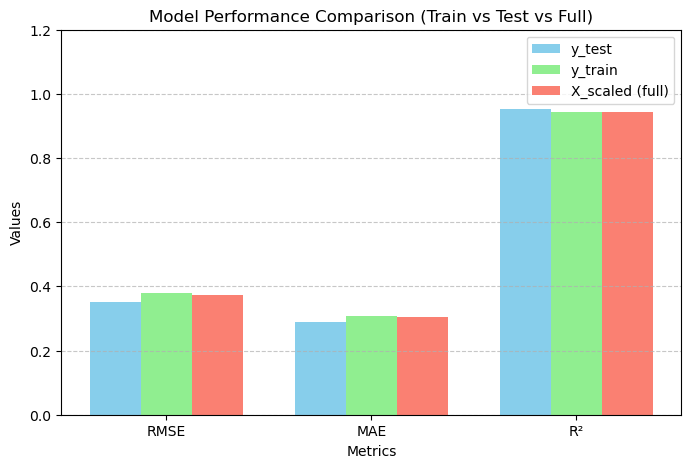

In [799]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics values
metrics = ["RMSE", "MAE", "R²"]
y_test_values = [0.3526, 0.2892, 0.9532]
y_train_values = [0.3787, 0.3071, 0.9422]
full_values = [0.3736, 0.3035, 0.9446]

# Bar chart positions
x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(8, 5))
plt.bar(x - width, y_test_values, width, label='y_test', color='skyblue')
plt.bar(x, y_train_values, width, label='y_train', color='lightgreen')
plt.bar(x + width, full_values, width, label='X_scaled (full)', color='salmon')

# Labels and formatting
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Model Performance Comparison (Train vs Test vs Full)")
plt.xticks(x, metrics)
plt.ylim(0, 1.2)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

###### MODEL TUNING

In [803]:
#Ridge and Lasso Tuning
from sklearn.linear_model import RidgeCV, LassoCV

# Ridge Regression with cross-validation
ridge_model = RidgeCV(alphas=np.logspace(-4, 4, 50), cv=5)
ridge_model.fit(X_train, y_train)

# Lasso Regression with cross-validation
lasso_model = LassoCV(alphas=np.logspace(-4, 4, 50), cv=5, max_iter=10000)
lasso_model.fit(X_train, y_train)

print(f"Best Ridge Alpha: {ridge_model.alpha_}")
print(f"Best Lasso Alpha: {lasso_model.alpha_}")

Best Ridge Alpha: 0.12648552168552957
Best Lasso Alpha: 0.0004498432668969444


In [805]:
#Cross-Validation for Linear Regression
from sklearn.model_selection import cross_val_score

# Cross-validation R²
cv_scores = cross_val_score(model, X_scaled, target, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Average CV R²:", cv_scores.mean())

Cross-Validation R² Scores: [0.93437963 0.90791586 0.95225623 0.91565762 0.92863428]
Average CV R²: 0.9277687240458545


OBSEVATION:
1) Average R²: 0.93 → Model explains most of the variance.

2) R² range: 0.91 to 0.95 → Very stable performance.

3) Ridge alpha: 0.126 → Small regularization improves stability.

4) Lasso alpha: 0.00045 → No major feature removal needed.

## 5) Conclusion: Model is accurate, stable, and not overfitting.

## OBSEVATION:


##### 1. Error Metrics
RMSE (0.35–0.37) & MAE (0.29–0.30): Errors are very low, showing accurate predictions.

MAPE (0.05%): Negligible percentage error, meaning predictions are nearly exact relative to actual values.

##### 2.Overfitting Check
Train and test metrics are almost identical.

No significant performance drop from train to test → model generalizes well and is not overfitting.

#### 3.Overall Conclusion
Your linear regression model is highly reliable, balanced, and accurate. Minor differences between train and test suggest that the model is both stable and well-regularized, making it suitable for deployment.